In [1]:
%matplotlib widget

A plane wave:

$$e^{ikx}$$

has constant (non-decaying) amplitude.

Using matplotlib backend: module://ipympl.backend_nbagg


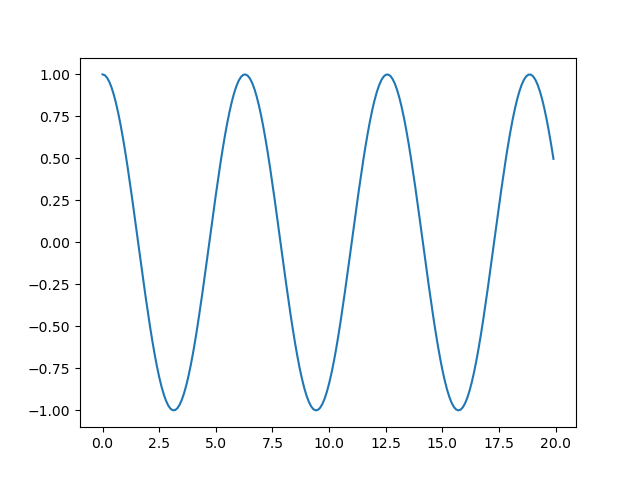

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib 

k = 1
x = np.arange(0, 20, .1)
f = np.exp(1j*k*x)

plt.figure()
plt.plot(x, f.real)

Attenuation can be specified as a complex wave-number:

$$k = k^\prime + ik^{\prime \prime}$$

Inserting $k^{\prime \prime}$ into the plane-wave gives:

$$
\begin{align}
e^{i(k^\prime + ik^{\prime \prime})x} \\
e^{ik^\prime x} e^{i(ik^{\prime \prime})x} \\
e^{ik^\prime x} e^{-k^{\prime \prime}x}
\end{align}
$$

So that $k^{\prime \prime}$ is the _plane-wave_-attenuation coefficient:

$$e^{-k^{\prime \prime}x}$$

in the unit _nepers per meter_.

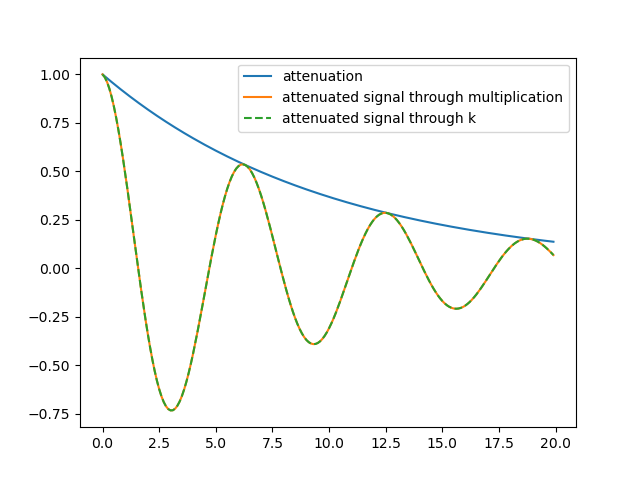

In [9]:
kpp = .1
a = np.exp(-kpp*x)

plt.figure()
plt.plot(x, a, label='attenuation')
plt.plot(x, f.real*a, label='attenuated signal through multiplication')

ka = k + 1j*kpp
fa = np.exp(1j*ka*x)
plt.plot(x, fa.real, '--', label='attenuated signal through k')
plt.legend()

In two dimensions, the Green's function to the Helmholtz equation is:

$$
  G_k(\mathbf{p}, \mathbf{q}) = \frac{i}{4}H_0^{(1)}(kr)
$$

where $H$ is the Hankel-function. For large arguments to the Hankel-function it is approximated by an asymptotic function:

$$
  H_0^{(1)}(kr) \sim \sqrt{\frac{2}{\pi kr}} \exp{\left [ i \left (kr - \frac{\pi}{4} \right ) \right ]}
$$

This means that using a complex $k$ will have _almost_ the same effect as for the plane-waves.

/tmp/ipykernel_52419/3935635569.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(2/(np.pi*z)) * np.exp(1j * (z - np.pi/4))
/tmp/ipykernel_52419/3935635569.py:11: RuntimeWarning: invalid value encountered in multiply
  return 1j/4 * ha(k*r)


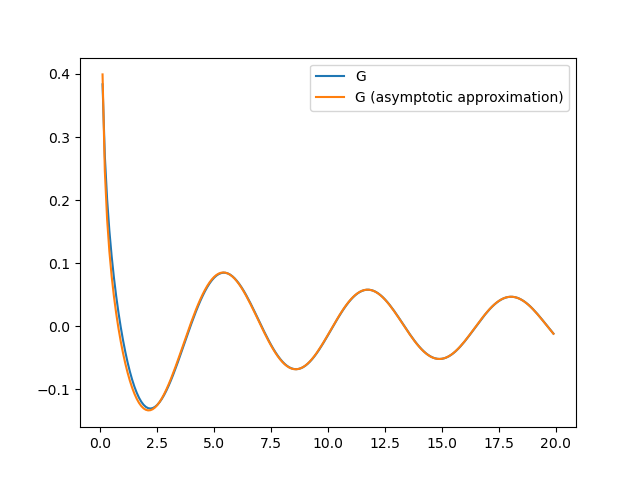

In [10]:
from scipy.special import hankel1

# https://encyclopediaofmath.org/wiki/Hankel_functions
def ha(z):
    return np.sqrt(2/(np.pi*z)) * np.exp(1j * (z - np.pi/4))

def g(k, r):
    return 1j/4 * hankel1(0, k*r)

def ga(k, r):
    return 1j/4 * ha(k*r)

fh = g(k, x)
fha = ga(k, x)
plt.figure()
plt.plot(x, fh.real, label='G')
plt.plot(x, fha.real, label='G (asymptotic approximation)')
plt.legend()

/tmp/ipykernel_52419/3935635569.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(2/(np.pi*z)) * np.exp(1j * (z - np.pi/4))
/tmp/ipykernel_52419/3935635569.py:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(2/(np.pi*z)) * np.exp(1j * (z - np.pi/4))


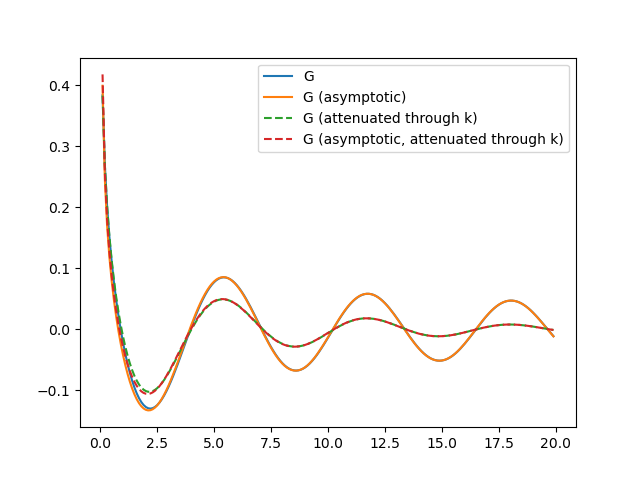

In [12]:
fh_a = g(ka, x)
fha_a = ga(ka, x)
plt.figure()
plt.plot(x, fh.real, label='G')
plt.plot(x, fha.real, label='G (asymptotic)')
plt.plot(x, fh_a.real, '--', label='G (attenuated through k)')
plt.plot(x, fha_a.real, '--', label='G (asymptotic, attenuated through k)')
plt.legend()

The difference between attenuation through multiplying with a decaying exponential function (as in the plane-wave), and through $k$ is plotted below (dashed lines). 

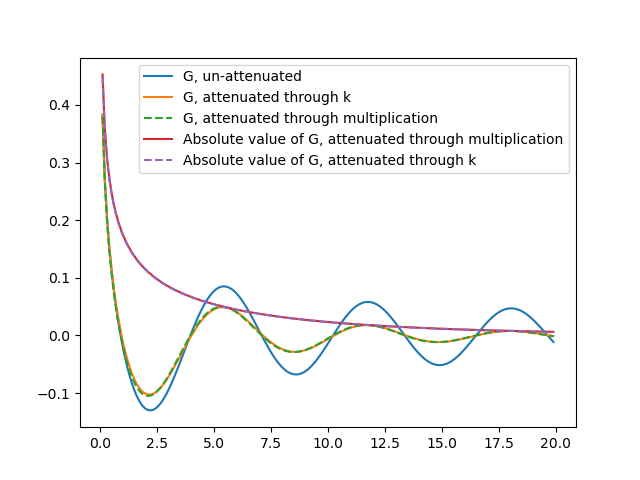

In [37]:
H = scipy.signal.hilbert(fh.real[1:]*a[1:])

plt.figure()
plt.plot(x, fh.real, label='G, un-attenuated')
#plt.plot(x, fha.real)
plt.plot(x, fh_a.real, label='G, attenuated through k')
#plt.plot(x, fha_a.real, '--')

plt.plot(x, fh.real*a, '--', label='G, attenuated through multiplication')

plt.plot(x, np.abs(fh*a), label='Absolute value of G, attenuated through multiplication')
plt.plot(x, np.abs(fh_a), '--', label='Absolute value of G, attenuated through k')
plt.legend()

0.004577963954300435
0.0110099303715956


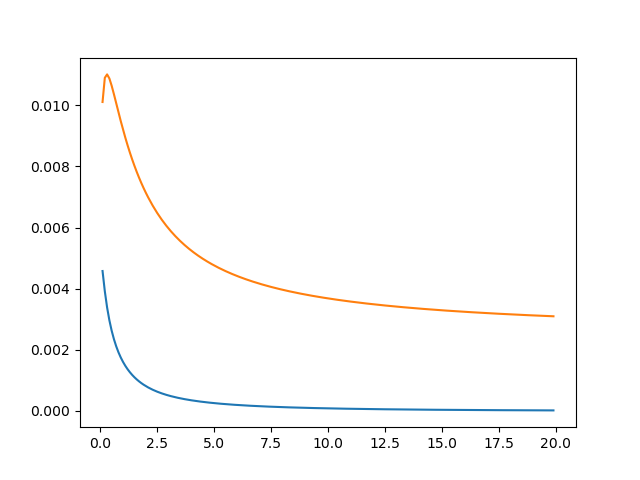

In [41]:
e = np.abs(np.abs(fh_a)-np.abs(fh*a))
print(np.nanmax(e))

r = e/np.abs(fh*a)
print(np.nanmax(r))


plt.figure()
plt.plot(x, e)
plt.plot(x, r)